In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None

### Load the data

In [56]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [57]:
data = pd.read_csv("./LoanStats3c.csv", header=1, parse_dates=date_cols, infer_datetime_format=True)

In [58]:
data.shape

(235631, 111)

### Check categorical features

In [59]:
# remove indexing features of id and member_id
# remove url, not quite useful
loans = data.drop(['id', 'member_id', 'url'], axis=1)

In [60]:
# transform object type into numeric
object_cols = loans.dtypes[loans.dtypes == 'object']
print object_cols
print loans[object_cols.index].head()

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
loan_status            object
pymnt_plan             object
desc                   object
purpose                object
title                  object
zip_code               object
addr_state             object
revol_util             object
initial_list_status    object
application_type       object
dtype: object
         term int_rate grade sub_grade                       emp_title  \
0   60 months   12.39%     C        C1                      MANAGEMENT   
1   36 months    6.99%     A        A3  Truck Driver Delivery Personel   
2   60 months   17.14%     D        D4       Senior Sales Professional   
3   36 months   13.66%     C        C3            Technical Specialist   
4   36 months   13.66%     C        C3                Admin Specialist   

 

In [61]:
# transform int_rate into numeric ie. 60 months => 60
loans.term = pd.to_numeric(loans.term.str[:3])
print(loans.term.head())

0    60.0
1    36.0
2    60.0
3    36.0
4    36.0
Name: term, dtype: float64


In [62]:
# transform term into numeric ie. 12.39% => 12.39
loans.int_rate = pd.to_numeric(loans.int_rate.str[:-1])
print(loans.int_rate.head())

0    12.39
1     6.99
2    17.14
3    13.66
4    13.66
Name: int_rate, dtype: float64


In [63]:
# transform emp_length into numeric ie. 10+ years => 10.0
loans.emp_length = loans.emp_length.str.extract("(\d+)", expand=False).map(float)
print(loans.emp_length.head())

0    10.0
1     8.0
2    10.0
3     1.0
4    10.0
Name: emp_length, dtype: float64


In [64]:
# transform revol_util into numeric ie. 29% => 29
loans.revol_util = pd.to_numeric(loans.revol_util.str[:-1])
print(loans.revol_util.head())

0     29.0
1     31.6
2    100.9
3     91.9
4     59.4
Name: revol_util, dtype: float64


In [65]:
# remove desc since it has too many NaNs, and the content is about the explanation of the field "purpose", which is redundant.
# print sum(pd.isnull(loans.desc))
# print loans.desc[-pd.isnull(loans.desc)].value_counts().head()
# loans.drop('desc', axis=1, inplace=True)

In [66]:
print loans[loans.dtypes[loans.dtypes == 'object'].index].head()

  grade sub_grade                       emp_title home_ownership  \
0     C        C1                      MANAGEMENT           RENT   
1     A        A3  Truck Driver Delivery Personel       MORTGAGE   
2     D        D4       Senior Sales Professional       MORTGAGE   
3     C        C3            Technical Specialist           RENT   
4     C        C3                Admin Specialist           RENT   

  verification_status  loan_status pymnt_plan desc             purpose  \
0     Source Verified   Fully Paid          n  NaN  debt_consolidation   
1        Not Verified      Current          n  NaN         credit_card   
2            Verified      Current          n  NaN                 car   
3     Source Verified  Charged Off          n  NaN  debt_consolidation   
4     Source Verified   Fully Paid          n  NaN  debt_consolidation   

                     title zip_code addr_state initial_list_status  \
0       Debt consolidation    235xx         VA                   w   
1  Cre

In [67]:
# only keep zipcode's first three digits
loans.zip_code = loans.zip_code.str[:3]

- Check the NaN in categorical features

In [68]:
pd.isnull(loans[loans.dtypes[loans.dtypes == 'object'].index]).sum()

grade                       2
sub_grade                   2
emp_title               13238
home_ownership              2
verification_status         2
loan_status                 2
pymnt_plan                  2
desc                   220352
purpose                     2
title                       2
zip_code                    2
addr_state                  2
initial_list_status         2
application_type            2
dtype: int64

In [69]:
# It makes sense taht NaNs in emp_titile could be explained as no input.
# We can find all others have 2 NaNs, let's check if they are from the same row

In [70]:
loans[-2:]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# It turns out the last two rows have all values of NaN, so let's remove both rows
loans = loans[:-2]

In [72]:
print loans[loans.dtypes[loans.dtypes == 'object'].index].head()

  grade sub_grade                       emp_title home_ownership  \
0     C        C1                      MANAGEMENT           RENT   
1     A        A3  Truck Driver Delivery Personel       MORTGAGE   
2     D        D4       Senior Sales Professional       MORTGAGE   
3     C        C3            Technical Specialist           RENT   
4     C        C3                Admin Specialist           RENT   

  verification_status  loan_status pymnt_plan desc             purpose  \
0     Source Verified   Fully Paid          n  NaN  debt_consolidation   
1        Not Verified      Current          n  NaN         credit_card   
2            Verified      Current          n  NaN                 car   
3     Source Verified  Charged Off          n  NaN  debt_consolidation   
4     Source Verified   Fully Paid          n  NaN  debt_consolidation   

                     title zip_code addr_state initial_list_status  \
0       Debt consolidation      235         VA                   w   
1  Cre

- Check the cardinality of features

In [73]:
loans[loans.dtypes[loans.dtypes == 'object'].index].describe()

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type
count,235629,235629,222393,235629,235629,235629,235629,15279,235629,235629,235629,235629,235629,235629
unique,7,35,75352,4,3,7,2,14843,13,2057,866,49,2,1
top,C,C2,Teacher,MORTGAGE,Source Verified,Current,n,Borrower added on 03/17/14 > Debt consolidat...,debt_consolidation,Debt consolidation,750,CA,w,INDIVIDUAL
freq,66565,13965,4569,119937,97741,133113,235626,11,143006,140624,2546,33288,123473,235629


In [74]:
# application_type has only one value for all datapoints, remove it
loans.drop('application_type', axis=1, inplace=True)

In [75]:
# emp_tile, title, zip_code have high cardinality, desc
loans.fillna('', inplace=True)

### Check numeric features

In [76]:
float_cols = loans.dtypes[loans.dtypes == 'float64']
print loans[float_cols.index].head()

   loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0    15000.0      15000.0          15000.0  60.0     12.39       336.64   
1    10400.0      10400.0          10400.0  36.0      6.99       321.08   
2    12800.0      12800.0          12800.0  60.0     17.14       319.08   
3     7650.0       7650.0           7650.0  36.0     13.66       260.20   
4     9600.0       9600.0           9600.0  36.0     13.66       326.53   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     78000.0  12.03          0.0             0.0       6.0      0.0   
1     58000.0  14.92          0.0             2.0      17.0      0.0   
2    125000.0   8.31          1.0             0.0       8.0      0.0   
3     50000.0  34.81          0.0             1.0      11.0      0.0   
4     69000.0  25.81          0.0             0.0      12.0      0.0   

   revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0   138008.0       17.0       0.00           0.00 

- post-decison features

In [77]:
post = ['funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']

In [78]:
loans.drop(post, axis=1, inplace=True)

- Check the NaNs along the float64 features

In [79]:
float_cols = loans.dtypes[loans.dtypes == 'float64']
float_nulls = pd.isnull(loans[float_cols.index]).sum()
print "Before removing NaNs"
print float_nulls

Before removing NaNs
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
chargeoff_within_12_mths      0
delinq_amnt                   0
mo_sin_old_rev_tl_op          0
mo_sin_rcnt_rev_tl_op         0
mo_sin_rcnt_tl                0
mort_acc                      0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_actv_rev_tl               0
num_bc_sats        

In [80]:
# Some features have all values of NaN(235629), let's remove them all first
loans.drop(float_nulls[float_nulls == 235629].index, axis=1, inplace=True)
print "After removing NaN columns"
float_cols = loans.dtypes[loans.dtypes == 'float64']
float_nulls = pd.isnull(loans[float_cols.index]).sum()
print float_nulls

After removing NaN columns
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
chargeoff_within_12_mths      0
delinq_amnt                   0
mo_sin_old_rev_tl_op          0
mo_sin_rcnt_rev_tl_op         0
mo_sin_rcnt_tl                0
mort_acc                      0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_actv_rev_tl               0
num_bc_sats  

In [81]:
# check other NaNs
float_nulls[float_nulls > 0]

Series([], dtype: int64)

If we check the meaning of above features, imputing NaNs as 0 could be the best choice

- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- mths_since_last_delinq: The number of months since the borrower's last delinquency.
- mths_since_last_record: The number of months since the last public record.
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- mths_since_last_major_derog: Months since most recent 90-day or worse rating
- avg_cur_bal: Average current balance of all accounts
- bc_open_to_buy: Total open to buy on revolving bankcards.
- bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- mo_sin_old_il_acct: Months since oldest bank installment account opened
- mths_since_recent_bc: Months since most recent bankcard account opened.
- mths_since_recent_bc_dlq:Months since most recent bankcard delinquency
- mths_since_recent_inq: Months since most recent inquiry.
- mths_since_recent_revol_delinq: Months since most recent revolving delinquency.
- num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months)
- percent_bc_gt_75: Percentage of all bankcard accounts > 75% of limit.

In [82]:
# Imputing NaNs into 0
loans[float_nulls[float_nulls > 0].index] = loans[float_nulls[float_nulls > 0].index].fillna(0)

- Check the variance of numeric features

In [83]:
float_cols = loans[loans.dtypes[loans.dtypes == 'float64'].index]

In [84]:
float_cols.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,235629.000000,235629.000000,235629.000000,235629.000000,2.356290e+05,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,2.356290e+05,235629.000000,235629.000000,235629.000000,235629.000000,235629.0,235629.000000,2.356290e+05,2.356290e+05,2.356290e+05,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.00000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,2.356290e+05,2.356290e+05,2.356290e+05,2.356290e+05
mean,14870.156793,43.441427,13.770735,442.476615,7.485415e+04,18.040770,0.344512,0.755760,11.668093,0.222460,1.650809e+04,26.010826,4924.565806,4923.169119,0.015440,1.0,0.005734,2.703017e+02,1.398023e+05,3.070905e+04,4.404785,0.010716,10.200166,185.748609,13.070407,7.997186,1.851173,0.503414,3.687445,5.804888,4.64773,8.544008,8.572918,8.276592,15.298643,5.769557,11.618825,0.003722,0.094581,2.006892,94.239886,0.134873,0.055757,1.702490e+05,4.838943e+04,2.003141e+04,3.988339e+04
std,8438.318193,11.100448,4.325650,245.046088,5.554753e+04,8.023002,0.898319,1.033981,5.268175,0.604696,2.146289e+04,11.895675,6211.427001,6209.875957,0.143081,0.0,0.081086,1.895292e+04,1.530226e+05,3.687980e+04,2.865349,0.116863,587.501136,93.040778,16.111818,8.738951,2.161213,1.264196,2.155902,3.141478,2.72445,4.821962,7.302646,4.318805,8.055087,3.123751,5.266031,0.065202,0.490951,1.604793,8.463073,0.376381,0.409256,1.719961e+05,4.596607e+04,2.020999e+04,4.143171e+04
min,1000.000000,36.000000,6.000000,23.360000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.700000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8325.000000,36.000000,10.990000,265.680000,4.537700e+04,12.020000,0.000000,0.000000,8.000000,0.000000,6.336000e+03,17.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,2.946000e+04,1.330000e+04,2.000000,0.000000,0.000000,120.000000,4.000000,3.000000,0.000000,0.000000,2.000000,4.000000,3.00000,5.000000,4.000000,5.000000,9.000000,4.000000,8.000000,0.000000,0.000000,1.000000,91.400000,0.000000,0.000000,4.780000e+04,2.076900e+04,7.000000e+03,1.359200e+04
50%,13000.000000,36.000000,13.650000,384.110000,6.500000e+04,17.630000,0.000000,0.000000,11.000000,0.000000,1.168600e+04,24.000000,2541.030000,2537.790000,0.000000,1.0,0.000000,0.000000e+00,8.202700e+04,2.280000e+04,4.000000,0.000000,0.000000,168.000000,8.000000,6.000000,1.000000,0.000000,3.000000,5.000000,4.00000,8.000000,7.000000,7.000000,14.000000,5.000000,11.000000,0.000000,0.000000,2.000000,97.600000,0.000000,0.000000,1.115140e+05,3.668500e+04,1.380000e+04,3.000000e+04
75%,20000.000000,60.000000,16.290000,578.690000,9.000000e+04,23.760000,0.000000,1.000000,14.000000,0.000000,2.052800e+04,33.000000,8029.600000,8025.210000,0.000000,1.0,0.000000,0.000000e+00,2.095060e+05,3.840000e+04,6.000000,0.000000,0.000000,234.000000,16.000000,10.000000,3.000000,0.000000,5.000000,7.00000

In [85]:
# policy_code has the std of 0, its values are all the same
# It's safe to remove both of them
loans.drop('policy_code', axis=1, inplace=True)

In [86]:
loans.shape

(235629, 96)

### Check the datatime features

In [87]:
datetime_cols = loans[loans.dtypes[loans.dtypes == 'datetime64[ns]'].index]

In [88]:
# check the NaT
datetime_nulls = pd.isnull(datetime_cols).sum()
print datetime_nulls

Series([], dtype: float64)


In [89]:
# Intuitively, let's check if payment dates are related to loan_status
datetime_nulls_cols = datetime_nulls.index.values
datetime_nulls_cols = np.append(datetime_nulls_cols, 'loan_status')
loans[datetime_nulls_cols].head(1000)
# We can find if nex_payment_d == 'NaT', the loan_status is all about not 'Current' status, which makes sense.

,loan_status
0,Fully Paid
1,Current
2,Current
3,Charged Off
4,Fully Paid
5,Fully Paid
6,Fully Paid
7,Current
8,Fully Paid
9,Fully Paid


In [90]:
# last_pymnt_d: Last month payment was received
# next_pymnt_d: Next scheduled payment date
# last_credit_pull_d: The most recent month LC pulled credit for this loan

In [91]:
loans.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'], dtype=object)

In [92]:
# Loan status: Current => Fully Paid(0) => In Grace Period(0-15) => Late (16-30 days) => Late (31-120 days) => Default => 'Charged Off'
print "if next_pymnt_d is 'NaT, the number of status that is neither 'Current' nor 'Fully Paid': "
print sum(loans[pd.isnull(loans.next_pymnt_d)].loan_status.apply(lambda x : x in ['Current', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Default']))
print "if next_pymnt_d is 'NaT, the number of status that is either 'Current' nor 'Fully Paid': "
print sum(loans[pd.isnull(loans.next_pymnt_d)].loan_status.apply(lambda x : x in ['Fully Paid', 'Charged Off']))

print "if next_pymnt_d is not 'NaT, the number of status that is neither 'Current' nor 'Fully Paid': "
print sum(loans[-pd.isnull(loans.next_pymnt_d)].loan_status.apply(lambda x : x in ['Current', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Default']))
print "if next_pymnt_d is not 'NaT, the number of status that is either 'Current' nor 'Fully Paid': "
print sum(loans[-pd.isnull(loans.next_pymnt_d)].loan_status.apply(lambda x : x in ['Fully Paid', 'Charged Off']))


if next_pymnt_d is 'NaT, the number of status that is neither 'Current' nor 'Fully Paid': 
0
if next_pymnt_d is 'NaT, the number of status that is either 'Current' nor 'Fully Paid': 
0
if next_pymnt_d is not 'NaT, the number of status that is neither 'Current' nor 'Fully Paid': 
140458
if next_pymnt_d is not 'NaT, the number of status that is either 'Current' nor 'Fully Paid': 
95171


- payment dates and loan_status are the same thing with different representations, just keep one loan_status
- last_credit_pull_d is also related with loan_status and last_pymnt_d
- Most importantly, all dates including issue_date are meaningless to predict loan_status, it's impossible to known the final dates to give a status.

In [93]:
# create a new feature credit length
loans['cr_len'] = (loans.issue_d.dt.date - loans.earliest_cr_line.dt.date).dt.days

In [94]:
# post-feature, drop all payment dates, but we keep issue_d to split the train and test data
loans.drop(['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line'], axis=1, inplace=True)

### Remove columns with loan status of 'Current' and 'Default'

In [95]:
loans = loans[loans.loan_status != 'Current']

In [96]:
loans = loans[loans.loan_status != 'Default']

In [97]:
loans.loan_status.value_counts()

Fully Paid            73905
Charged Off           21266
Late (31-120 days)     3940
In Grace Period        2522
Late (16-30 days)       817
Name: loan_status, dtype: int64

In [98]:
loans.shape

(102450, 93)

- check the correlation amongst numeric values

In [99]:
float_cols = loans[loans.dtypes[loans.dtypes == 'float64'].index]

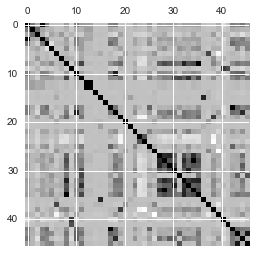

In [100]:
plt.matshow(float_cols.corr())

In [101]:
corrs = float_cols.corr().abs().unstack().order(kind="quicksort", ascending=False)

In [102]:
corrs[corrs.between(0.5, 1, inclusive=False)][1::2].head()

out_prncp            out_prncp_inv      0.999999
open_acc             num_sats           0.998487
num_rev_tl_bal_gt_0  num_actv_rev_tl    0.986769
tot_hi_cred_lim      tot_cur_bal        0.967795
loan_amnt            installment        0.954092
dtype: float64

### Save the file

In [103]:
loans = loans.reset_index(drop=True)

In [106]:
loans.to_csv('./loans.w1.csv', index=False, na_rep='')

In [51]:
loans.zip_code.dtype

dtype('O')

In [105]:
np.sum(pd.isnull(loans), axis=0)

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                              0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record            0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  